# Radioterapia
Simulaciones de deposiciones de energía en agua para haces de: fotones, electrones y hadrones ligeros.
Basado en DoseDeposition de Miniscatter K. Sjobak (October 23rd 2018, January 2019)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import ROOT
import os

#%matplotlib notebook #Doesn't work in JupyterLab, only Jupyter
%matplotlib inline

# plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 150
# 
# #colorCycle = plt.rcParams['axes.prop_cycle']
# plt.rcParams['figure.max_open_warning'] = 100
#Setup MiniScatter
import sys
MiniScatter_path="/opt/MiniScatter/build"
sys.path.append(MiniScatter_path)
#import CLEARview

import miniScatterDriver
import miniScatterScanner
import miniScatterPlots

Welcome to JupyROOT 6.20/02


In [2]:
# Used for normalization of the dose:
# need to scale with (number of actual particles) / (number of simulation particles)
SI_e = 1.60217662e-19 #[C]
beamCharge_total = 1e-9 # Beam charge [C]
beamCharge_numpart = beamCharge_total/SI_e

In [3]:
### Basic simulation parameters ###

QUIET = False
TRYLOAD = False #Try to load already existing data instead of recomputing?
NUM_THREADS = 10
TMPFOLDER = "/tmp/miniScatter/Pthera-EnergyScan"


baseSimSetup = {}
#baseSimSetup["PHYS"] = "QGSP_BERT__SS"
baseSimSetup["PHYS"] = "QGSP_BERT"
baseSimSetup["N"] = 50000 #number of simulated particles emited by the source


#baseSimSetup["ZOFFSET_BACKTRACK"] = True
baseSimSetup["ZOFFSET"]           = 0.0 #Auto

baseSimSetup["WORLDSIZE"] = 1000.0

baseSimSetup["DIST"] = 3000.0 #Detector distance from target center [mm] 

baseSimSetup["QUICKMODE"] = False #Include slow plots
baseSimSetup["MINIROOT"]  = True #Skip TTRees in the .root files
baseSimSetup["EDEP_DZ"]   = 1.0 #Negative: Only rz histograms

#Lowest energy particles to consider for analysis
#E_CUTOFF = baseSimSetup["ENERGY"]*0.9;

#Store the .root files in a subfolder from MiniScatter/examples, to be easy to find
baseSimSetup["OUTFOLDER"]=os.path.join(os.getcwd(),"outputs")
baseSimSetup["THICK"] = 1000 # More than sufficient for at least 200 MeV
baseSimSetup["MAT"] = "G4_WATER" #target material




In [4]:
#Include to override TRYLOAD
TRYLOAD = False

In [5]:
#Photon pencil beam
baseSimSetup_ph = baseSimSetup.copy()
baseSimSetup_ph["BEAM"]    = "gamma"
baseSimSetup_ph["OUTNAME"] = "gamma"
baseSimSetup["ENERGY"] = 1.0 #[MeV]

(twiss_ph, numPart_ph, objects_ph) = miniScatterDriver.getData_tryLoad(baseSimSetup_ph, tryload=TRYLOAD,\
    getObjects=["targetEdep","target_edep_dens","target_edep_rdens","metadata"])


Did not find any pre-computed data at '/nfs/fanae/user/clara/Practica_faea/Genat4/MiniScatter/examples/outputs/gamma.root', computing now.
Running command line: './MiniScatter -t 1000 -m G4_WATER -d 3000.0 -w 1000.0 -p QGSP_BERT -n 50000 -b gamma -z 0.0 -f gamma -o /nfs/fanae/user/clara/Practica_faea/Genat4/MiniScatter/examples/outputs -r --edepDZ 1.0'
RunFolder = './log/'
logName   = '/nfs/fanae/user/clara/Practica_faea/Genat4/MiniScatter/examples/outputs/gamma.txt'
/
Event# 0
Event# 500
Event# 1000
Event# 1500
Event# 2000
Event# 2500
Event# 3000
Event# 3500
Event# 4000
Event# 4500
Event# 5000
Event# 5500
Event# 6000
Event# 6500
Event# 7000
Event# 7500
Event# 8000
Event# 8500
Event# 9000
Event# 9500
Event# 10000
Event# 10500
Event# 11000
Event# 11500
Event# 12000
Event# 12500
Event# 13000
Event# 13500
Event# 14000
Event# 14500
Event# 15000
Event# 15500
Event# 16000
Event# 16500
Event# 17000
Event# 17500
Event# 18000
Event# 18500
Event# 19000
Event# 19500
Event# 20000
Event# 20500
Even

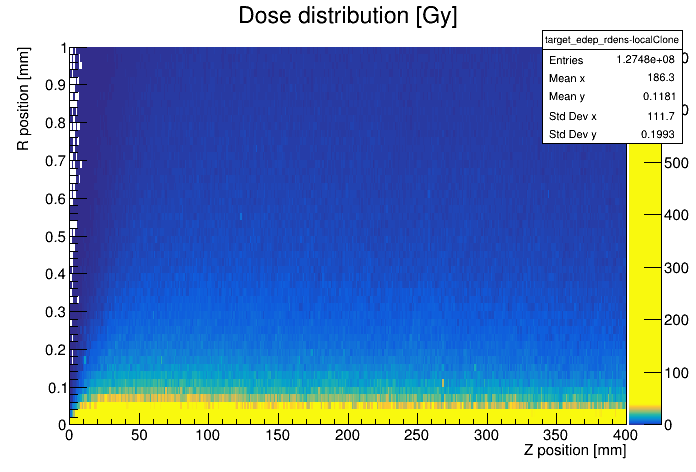

In [7]:
#Plot in the  xy plane
rzScaled_ph = miniScatterPlots.plotRZgray(objects_ph, baseSimSetup_ph["N"], 1e-9/SI_e)

canvas = ROOT.TCanvas()
rzScaled_ph.SetContour(100, np.linspace(0,40,100))
rzScaled_ph.GetXaxis().SetRangeUser(0,400)
rzScaled_ph.GetYaxis().SetRangeUser(0,1)
rzScaled_ph.Draw('colz')
canvas.Draw()

Warning, selected r0 is not on a bin edge.
 Closest edges are at 0.1 [mm] and 0.12 [mm]


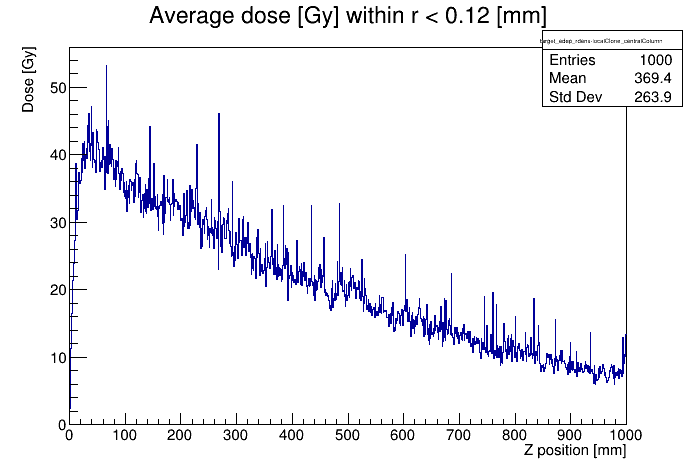

In [8]:
#Dose as a function of depth
rzScaled_center_ph = miniScatterPlots.plotZgray(rzScaled_ph, 0.1) #pencil beam el equilibrio no se cumple? 
rzScaled_center_ph.GetXaxis().SetRangeUser(0,1000)
canvas = ROOT.TCanvas()
rzScaled_center_ph.Draw()
canvas.Draw()

In [32]:
#More realistic beam: falt energy probablity 
baseSimSetup_phwf = baseSimSetup.copy()
baseSimSetup_phwf["BEAM"] = "gamma"
baseSimSetup_phwf["OUTNAME"]="photons_wide-flat"
baseSimSetup_phwf["N"] = 100000 #number of simulated particles emited by the source
baseSimSetup_phwf["BEAM_RCUT"] = 3.0
baseSimSetup_phwf["ENERGY"] = 2.0 #[MeV]
(twiss_phwf, numPart_phwf, objects_phwf) = \
    miniScatterDriver.getData_tryLoad(baseSimSetup_phwf, tryload=TRYLOAD,
                              getObjects=["targetEdep","target_edep_dens","target_edep_rdens","metadata", 'init_x', 'init_y', 'init_xy'])

print()
print (twiss_phwf['init'])

TryLoad is False, computing now.
Running command line: './MiniScatter -t 1000 -m G4_WATER -d 3000.0 -w 1000.0 -p QGSP_BERT -n 100000 -e 2.0 -b gamma -z 0.0 --beamRcut 3.0 -f photons_wide-flat -o /eos/home-c/cramonal/SWAN_projects/FAEA/MiniScatter/examples/outputs -r --edepDZ 1.0'
RunFolder = '/eos/home-c/cramonal/SWAN_projects/FAEA/MiniScatter/build_SWAN'
logName   = '/eos/home-c/cramonal/SWAN_projects/FAEA/MiniScatter/examples/outputs/photons_wide-flat.txt'
-
Event# 0
Event# 500
Event# 1000
Event# 1500
Event# 2000
Event# 2500
Event# 3000
Event# 3500
Event# 4000
Event# 4500
Event# 5000
Event# 5500
Event# 6000
Event# 6500
Event# 7000
Event# 7500
Event# 8000
Event# 8500
Event# 9000
Event# 9500
Event# 10000
Event# 10500
Event# 11000
Event# 11500
Event# 12000
Event# 12500
Event# 13000
Event# 13500
Event# 14000
Event# 14500
Event# 15000
Event# 15500
Event# 16000
Event# 16500
Event# 17000
Event# 17500
Event# 18000
Event# 18500
Event# 19000
Event# 19500
Event# 20000
Event# 20500
Event# 21000


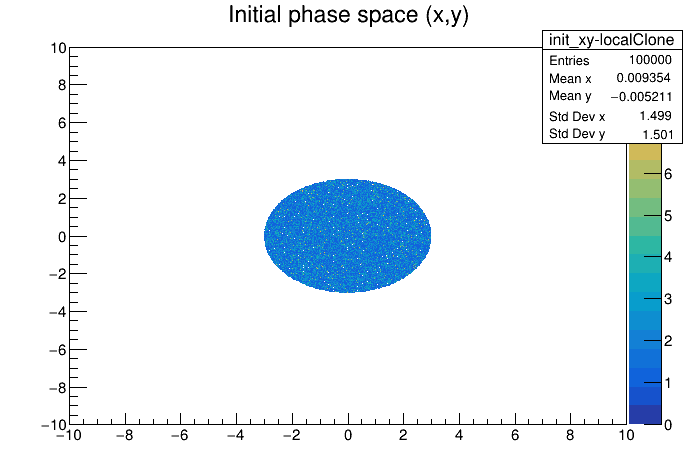

In [37]:
c = ROOT.TCanvas()
objects_phwf['init_xy'].Draw('colz')
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: target_edep_rdens-localClone_centralColumn (Potential memory leak).


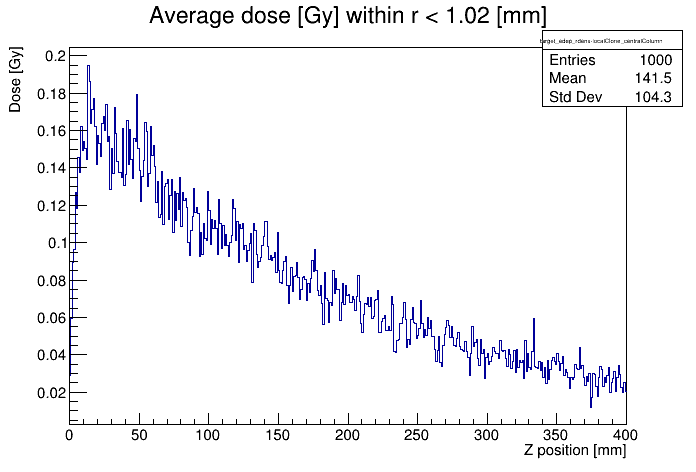

In [33]:
rzScaled_phwf = miniScatterPlots.plotRZgray(objects_phwf, baseSimSetup_phwf["N"], 1e-9/SI_e)
rzScaled_center_phwf = miniScatterPlots.plotZgray(rzScaled_phwf, 1)
rzScaled_center_phwf.GetXaxis().SetRangeUser(0,400)
canvas = ROOT.TCanvas()
rzScaled_center_phwf.Draw()
canvas.Draw()

In [34]:
#Now we can launch protons 
#can also launch ions, for example: baseSimSetup_cw["BEAM"] = "ion::6,12"

baseSimSetup_pw = baseSimSetup.copy()
baseSimSetup_pw["BEAM"] = "proton"
baseSimSetup_pw["OUTNAME"]="protons-flat"
baseSimSetup_pw["BEAM_RCUT"] = 6.0
baseSimSetup_pw["ENERGY"] = 200.0 #[MeV]
(twiss_pw, numPart_pw, objects_pw) = \
    miniScatterDriver.getData_tryLoad(baseSimSetup_pw, tryload=TRYLOAD,
                              getObjects=["targetEdep","target_edep_dens",'target_edep_rdens',"metadata"])

TryLoad is False, computing now.
Running command line: './MiniScatter -t 1000 -m G4_WATER -d 3000.0 -w 1000.0 -p QGSP_BERT -n 50000 -e 200.0 -b proton -z 0.0 --beamRcut 6.0 -f protons-flat -o /eos/home-c/cramonal/SWAN_projects/FAEA/MiniScatter/examples/outputs -r --edepDZ 1.0'
RunFolder = '/eos/home-c/cramonal/SWAN_projects/FAEA/MiniScatter/build_SWAN'
logName   = '/eos/home-c/cramonal/SWAN_projects/FAEA/MiniScatter/examples/outputs/protons-flat.txt'
-
Event# 0
Event# 500
Event# 1000
Event# 1500
Event# 2000
Event# 2500
Event# 3000
Event# 3500
Event# 4000
Event# 4500
Event# 5000
Event# 5500
Event# 6000
Event# 6500
Event# 7000
Event# 7500
Event# 8000
Event# 8500
Event# 9000
Event# 9500
Event# 10000
Event# 10500
Event# 11000
Event# 11500
Event# 12000
Event# 12500
Event# 13000
Event# 13500
Event# 14000
Event# 14500
Event# 15000
Event# 15500
Event# 16000
Event# 16500
Event# 17000
Event# 17500
Event# 18000
Event# 18500
Event# 19000
Event# 19500
Event# 20000
Event# 20500
Event# 21000
Event# 2

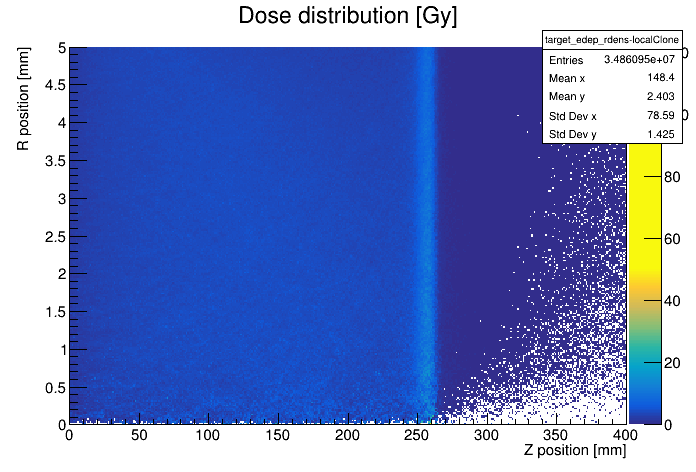

In [35]:
rzScaled_pw = miniScatterPlots.plotRZgray(objects_pw, baseSimSetup_pw["N"], 1e-9/SI_e)
canvas = ROOT.TCanvas()
rzScaled_pw.SetContour(100, np.linspace(0,50,100))
rzScaled_pw.GetXaxis().SetRangeUser(0,400)
rzScaled_pw.GetYaxis().SetRangeUser(0,5)
rzScaled_pw.Draw('colz')
canvas.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: target_edep_rdens-localClone_centralColumn (Potential memory leak).


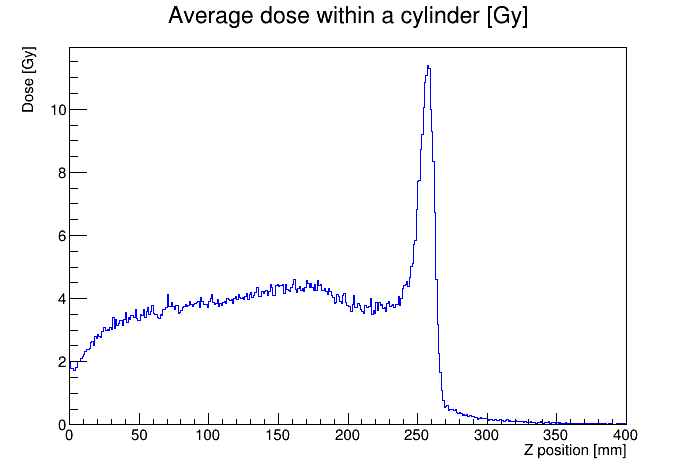

In [36]:
canvas = ROOT.TCanvas()
rzScaled_center_pw1 = miniScatterPlots.plotZgray(rzScaled_pw, 1)
rzScaled_center_pw1.GetXaxis().SetRangeUser(0,400)
rzScaled_center_pw1.SetName(rzScaled_center_pw1.GetName() + "-1mm")
rzScaled_center_pw1.SetTitle("Average dose within a cylinder [Gy]")
rzScaled_center_pw1.SetLineColor(ROOT.kBlue)
rzScaled_center_pw1.SetStats(False)
rzScaled_center_pw1.Draw()

canvas.Draw()